# Covid-19 - Brasil
## Redes Complexas - 2020/1
Alunos: 
1. Johnny Gomes
2. Nomeriano Neto
3. Reinaldo Ribeiro

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### Entendimento dos dados a partir de graficos e outros indicadores 

In [2]:
from bokeh.plotting import figure, output_file, show

In [3]:
# import sys
# print(sys.version)
# print(nx.__version__)

In [4]:
# lê info regionais - divididos por estados, inclusive
df = pd.read_csv("./data/covid_regioes.csv")
df.sample(5)

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
2281,Centro-Oeste,DF,53,27/03/20,13,230,30,0,0
1043,Nordeste,PE,26,06/05/20,19,9881,556,803,54
81,Norte,AC,12,19/03/20,12,3,3,0,0
656,Nordeste,PI,22,23/03/20,13,6,2,0,0
1952,Sul,RS,43,15/04/20,16,747,47,19,1


In [5]:
# reordena registros (rows) do dataframe para que estados aparecam em ordem alfabetica:

df.sort_values(by=['estado', 'semanaEpi'], inplace=True, ignore_index=True)

df.head()

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,Norte,AC,12,19/03/20,12,3,3,0,0
1,Norte,AC,12,20/03/20,12,7,4,0,0
2,Norte,AC,12,21/03/20,12,9,2,0,0
3,Norte,AC,12,22/03/20,13,11,2,0,0
4,Norte,AC,12,23/03/20,13,11,0,0,0


In [6]:
df.shape

(2355, 9)

In [7]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355 entries, 0 to 2354
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   regiao           2355 non-null   object
 1   estado           2355 non-null   object
 2   coduf            2355 non-null   int64 
 3   data             2355 non-null   object
 4   semanaEpi        2355 non-null   int64 
 5   casosAcumulado   2355 non-null   int64 
 6   casosNovos       2355 non-null   int64 
 7   obitosAcumulado  2355 non-null   int64 
 8   obitosNovos      2355 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 165.7+ KB


In [8]:
# le dados a partir do pandas dataframe:
# G = nx.from_pandas_edgelist(df, source='pais', target='regiao')
G = nx.from_pandas_edgelist(df, source='regiao', target='estado')


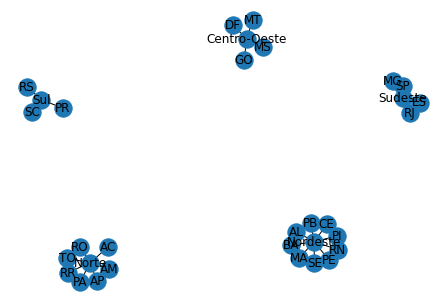

In [9]:

nx.draw(G, with_labels=True)


In [13]:
# cria lista -- em ordem alfabetica -- de nós-estados:
estados = df.estado.unique()
estados = list(estados)

# cria lista -- em ordem alfabetica -- de nós-regioes:
regioes = df.regiao.unique()
regioes = list(regioes)


In [14]:
# instancia nós-estado com parametros iguais a todos:
for e in estados:
    G.add_node(e,
              dim='estado',
              totalCasos = 0,
              totalMortes = 0,
              temperatura=0)

for r in regioes:
    G.add_node(r,
              dim='regiao',
              totalCasos = 0,
              totalMortes = 0,
              temperatura=0)

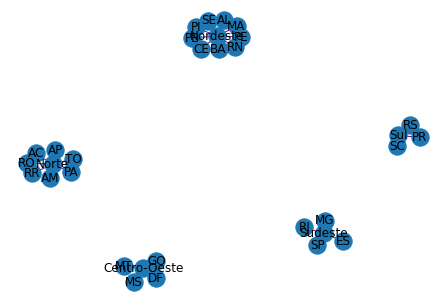

In [15]:
# desenha o grafo G:

nx.draw(G, edge_color='purple', with_labels=True)


In [16]:
for node in G.nodes(data=True):
    print(node)

('Norte', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('AC', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('Nordeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('AL', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('AM', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('AP', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('BA', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('CE', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('Centro-Oeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('DF', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('Sudeste', {'dim': 'regiao', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('ES', {'dim': 'estado', 'totalCasos': 0, 'totalMortes': 0, 'temperatura': 0})
('GO', {'dim': 'estado', 'to

In [17]:
# 1 - cria arestas a partir da distribuicao geografica das regioes:

G.add_edges_from(
    [('Norte', 'Nordeste'), ('Norte', 'Centro-Oeste'), ('Nordeste', 'Centro-Oeste'), ('Nordeste', 'Sudeste'),
     ('Centro-Oeste', 'Sudeste'),('Centro-Oeste', 'Sul'), ('Sudeste', 'Sul')])



In [18]:
color_map = []
for no in G.nodes(data=True):
    if (no[1]['dim'] == 'regiao'):
        color_map.append('green')
    else: 
        color_map.append('blue')

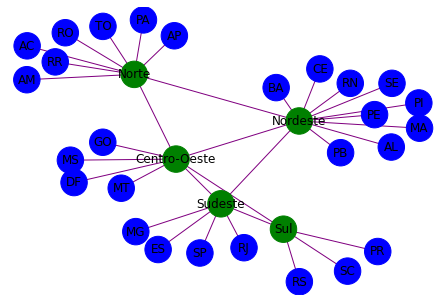

In [19]:
# 2.2.1 - ver a estrutura do grafo:
nx.draw(G, node_color=color_map, edge_color='purple', node_size=700, with_labels=True)

In [20]:
# cria arestas a partir da disposicao geografica entre nos-estados por regiao:

# 1. Regiao Sul:
G.add_edges_from(
    [('RS', 'SC'),('SC', 'PR')]) # ok

# 2. Sudeste:
G.add_edges_from(
    [('SP', 'MG'), ('SP', 'RJ'), ('RJ', 'MG'),('RJ', 'ES'),('ES', 'MG')]) # ok

# 3. Centro-Oeste:
G.add_edges_from(
    [('DF', 'GO'), ('GO', 'MT'),('GO', 'MS'),('MT','MS')]) # ok

# 4. Norte:
G.add_edges_from(
    [('TO', 'PA'),('PA', 'AP'),('PA', 'RR'),('PA', 'AM'),('AM', 'AC'),
     ('AM', 'RO'),('AM','RR'),('AC', 'RO')]) # ok

# 5. Nordeste:
G.add_edges_from(
    [('BA', 'SE'), ('BA', 'AL'),('BA', 'PE'),('BA', 'PI'),('PE', 'PB'),
     ('PE', 'CE'),('PE', 'PI'),('CE', 'PI'),('CE', 'PB'),('SE','AL'),
     ('AL','PE'),('CE', 'RN'),('PB', 'RN'),('PI','MA')]) # ok


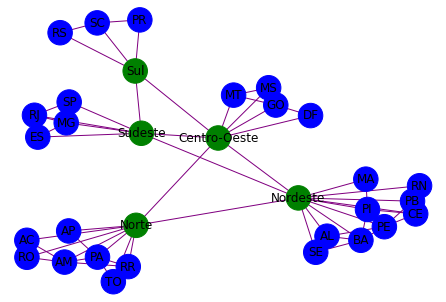

In [21]:

nx.draw(G, node_color=color_map, edge_color='purple', node_size=600, with_labels=True)


In [22]:
# informacoes sobre o grafo atual:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 32\nNumber of edges: 67\nAverage degree:   4.1875'

In [23]:
# mapeia as arestas extra-regionais:
G.add_edges_from(
    [('PR', 'SP'),('PR', 'MS'),('ES', 'BA'),('MG', 'BA'),('SP', 'MS'),('MG', 'GO'),
     ('TO', 'GO'),('TO', 'MT'),('TO', 'MA'),('TO','PI'),('TO','BA'),
     ('GO','BA'),('PA','MA'),('PA','MT'),('RO','MT')])

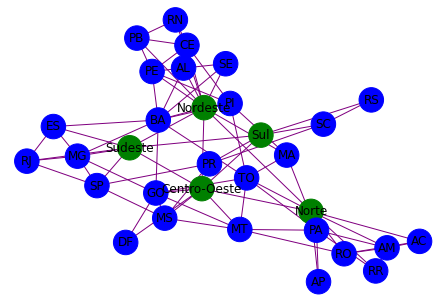

In [24]:
# desenha o grafo em sua estrutura final em relacao vertices a arestas:
nx.draw(G, node_color=color_map, edge_color='purple', node_size=600, with_labels=True)


In [25]:
df.sample(5)

,regiao,estado,coduf,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
1975,Sul,RS,43,20/05/20,21,4973,1223,161,10
1818,Norte,RO,11,02/06/20,23,5477,305,172,13
759,Centro-Oeste,GO,52,01/05/20,18,808,27,29,0
103,Nordeste,AL,27,29/03/20,14,17,3,0,0
474,Nordeste,CE,23,23/04/20,17,4598,688,266,33


In [26]:
# definidos/instanciados anteriormente no inicio do notebook:

print(estados, regioes)


['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO'] ['Norte', 'Nordeste', 'Centro-Oeste', 'Sudeste', 'Sul']


In [ ]:
# aqui apenas para matar a curiosidade quanto a estrutura alternativa do dataframe:
# total = df.groupby(['regiao','estado'])
# total.first()

In [27]:

tot_est     = df.groupby('estado')['casosAcumulado'].max()
tot_est_sum = df.groupby('estado')['casosAcumulado'].max().sum()

tot_reg     = df.groupby(['regiao', 'estado'])['casosAcumulado'].max()
tot_reg_sum = df.groupby(['regiao', 'estado'])['casosAcumulado'].max().sum()

In [28]:
print(tot_est)
type(tot_est)

estado
AC      8128
AL     15706
AM     49811
AP     13294
BA     28715
CE     65605
DF     16629
ES     20659
GO      6124
MA     49371
MG     15883
MS      2324
MT      4100
PA     56032
PB     20951
PE     40705
PI      7621
PR      7031
RJ     69499
RN     10888
RO      8626
RR      5768
RS     12250
SC     11565
SE      9727
SP    144593
TO      5807
Name: casosAcumulado, dtype: int64


pandas.core.series.Series

In [29]:
est_list = dict(tot_est)
est_list

{'AC': 8128,
 'AL': 15706,
 'AM': 49811,
 'AP': 13294,
 'BA': 28715,
 'CE': 65605,
 'DF': 16629,
 'ES': 20659,
 'GO': 6124,
 'MA': 49371,
 'MG': 15883,
 'MS': 2324,
 'MT': 4100,
 'PA': 56032,
 'PB': 20951,
 'PE': 40705,
 'PI': 7621,
 'PR': 7031,
 'RJ': 69499,
 'RN': 10888,
 'RO': 8626,
 'RR': 5768,
 'RS': 12250,
 'SC': 11565,
 'SE': 9727,
 'SP': 144593,
 'TO': 5807}

In [32]:
# atribui casos acumulados a cada no-estado:

for no in G.nodes(data=True):
    if (no[1]['dim'] == 'estado'):
#         print(no)
        for caso_estado in est_list:
            if (no[0]==caso_estado):
                no[1]['totalCasos'] = est_list[caso_estado]
#                 print(no[0], '->', caso_estado)
     

In [33]:
# just for fun:

for no in G.nodes(data=True):
    if (no[1]['dim'] == 'estado'):
        print(no)


('AC', {'dim': 'estado', 'totalCasos': 8128, 'totalMortes': 0, 'temperatura': 0})
('AL', {'dim': 'estado', 'totalCasos': 15706, 'totalMortes': 0, 'temperatura': 0})
('AM', {'dim': 'estado', 'totalCasos': 49811, 'totalMortes': 0, 'temperatura': 0})
('AP', {'dim': 'estado', 'totalCasos': 13294, 'totalMortes': 0, 'temperatura': 0})
('BA', {'dim': 'estado', 'totalCasos': 28715, 'totalMortes': 0, 'temperatura': 0})
('CE', {'dim': 'estado', 'totalCasos': 65605, 'totalMortes': 0, 'temperatura': 0})
('DF', {'dim': 'estado', 'totalCasos': 16629, 'totalMortes': 0, 'temperatura': 0})
('ES', {'dim': 'estado', 'totalCasos': 20659, 'totalMortes': 0, 'temperatura': 0})
('GO', {'dim': 'estado', 'totalCasos': 6124, 'totalMortes': 0, 'temperatura': 0})
('MA', {'dim': 'estado', 'totalCasos': 49371, 'totalMortes': 0, 'temperatura': 0})
('MG', {'dim': 'estado', 'totalCasos': 15883, 'totalMortes': 0, 'temperatura': 0})
('MS', {'dim': 'estado', 'totalCasos': 2324, 'totalMortes': 0, 'temperatura': 0})
('MT', 

In [ ]:

reg_list = dict(tot_reg)

print(reg_list)
type(reg_list)

In [ ]:
for i in reg_list:
    print(i)
#     break

In [ ]:
for key in reg_list:
    print(key, '->', reg_list[key])


In [ ]:
casos_estado = []
for key, value in reg_list.items():
    casos_estado.append((key[1],value))
print(casos_estado)

In [ ]:
# 3 - atribuir numero de casos/mortes a cada nó-estado:
i = 0
for no in G.nodes(data=True):
#     no[1]['dim'] = 'estado'
#     no[1]['totalCasos'] = 
    print(no)

In [ ]:
for no in G.nodes(data=True):
    print(no[1])

In [ ]:
# 4 - somar valores dos nós-estado e atribuir a sua respectiva regiao:


In [ ]:
# 5 - O diametro do nó é relativo ao numero de casos (usar interpolador entre o menor e maior numero):


In [ ]:
# 6 - animar o grafo e adicionar 'hover' com informacoes de numero de casos/mortes e/ou outras:


In [ ]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'TO')


In [ ]:
# grafico do crescimento de novos casos ao longos das semanas (estado == 'AM')


In [ ]:
# pega total de casos acumulados no Tocantins:


### Documentacao do processo - Pipeline da Produção da Rede Covid-19 - Brasil


Obs.: Esse _pipeline_ foi desenvolvido para trabalhos na área de **Descoberta de Conhecimento**, entretanto a certo ponto os passos bem definidos podem ajudar na compreensão e tratamento dos dados e posterior obtenção e apresentação do conhecimento obtido.

mais informações em: [KDD - Descoberta de Conhecimento em Bases de Dados](https://lume.ufrgs.br/handle/10183/8968)

### 1. Entendimento do dominio da aplicação:

Estudamos sobre Covid-19 e sobre a propagacao do virus pelo mundo

### 2. Criação da base de dados de interesse:

A base de dados foi criada por orgao federal e disponibilizada em:
[Saúde.Gov](https://covid.saude.gov.br/) mais informacoes em [SUS Analítico](https://susanalitico.saude.gov.br/)

### 3. Limpeza de dados e pré processamento:

#### 3.a) Limpeza dos dados:

Dividimos a base original em tres arquivos contendo: 
    1. Dados gerais do pais;
    2. Dados regionais;
    3. Dados estaduais e municipais;
    
Algumas colunas se fizeram desnecessarias, como o numero de habitantes em cada uma dessas microregioes por isso, foram descartadas da base em que trabalhamos.

#### 3.b) Integração dos dados:

Nao houve integracao de dados novos ou externos à base já existente.

#### 3.c) Transformação dos dados:

### 4. Redução e Projeção de Dados:

### 5. Escolha das funções de mineração:

### 6. Escolha dos algoritmos de mineração:

### 7. Mineração:

### 8. Interpretação dos dados:

### 9. Utilização/Publicação/Compartilhamento do conhecimento descoberto: